
# ADF

####  Use the data provided for earlier problems to test the non-stationarity in the time series with Augmented Dickey-Fuller test. Take the level of significance equal to 5%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 9)

In [2]:
cloth=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\cloth_sales.csv",index_col='date', parse_dates=True)
cloth

,sales
date,
Jan-92,4889
Feb-92,5198
Mar-92,6061
Apr-92,6720
May-92,6811
...,...
Aug-03,11055
Sep-03,9941
Oct-03,10763


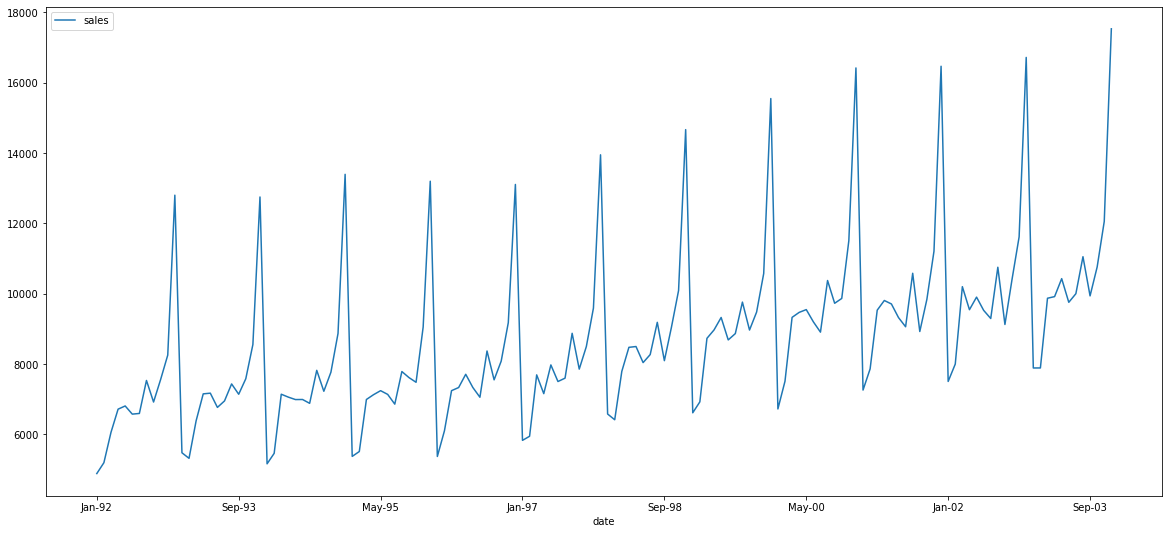

In [3]:
# Plot ant show the time series on axis ax
fig, ax = plt.subplots();
cloth.plot(ax=ax);

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
test_result=adfuller(cloth['sales'])
test_result

(0.6384826676448164,
 0.9885267347007707,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1856.6652424701979)

In [6]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(cloth['sales'])

ADF Test Statistic : 0.6384826676448164
p-value : 0.9885267347007707
#Lags Used : 14
Number of Observations : 129
weak evidence against null hypothesis,indicating it is non-stationary 


In [7]:
cloth['Sales First Difference'] = cloth['sales'] - cloth['sales'].shift(1)
cloth['Seasonal First Difference']=cloth['sales']-cloth['sales'].shift(12)
cloth

,sales,Sales First Difference,Seasonal First Difference
date,,,
Jan-92,4889,NaN,NaN
Feb-92,5198,309.0,NaN
Mar-92,6061,863.0,NaN
Apr-92,6720,659.0,NaN
May-92,6811,91.0,NaN
...,...,...,...
Aug-03,11055,1052.0,300.0
Sep-03,9941,-1114.0,813.0
Oct-03,10763,822.0,355.0


In [10]:
# Again testing if data is stationary
adfuller_test(cloth['Sales First Difference'].dropna())

ADF Test Statistic : -3.2611246781041316
p-value : 0.01670818921919844
#Lags Used : 13
Number of Observations : 129
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


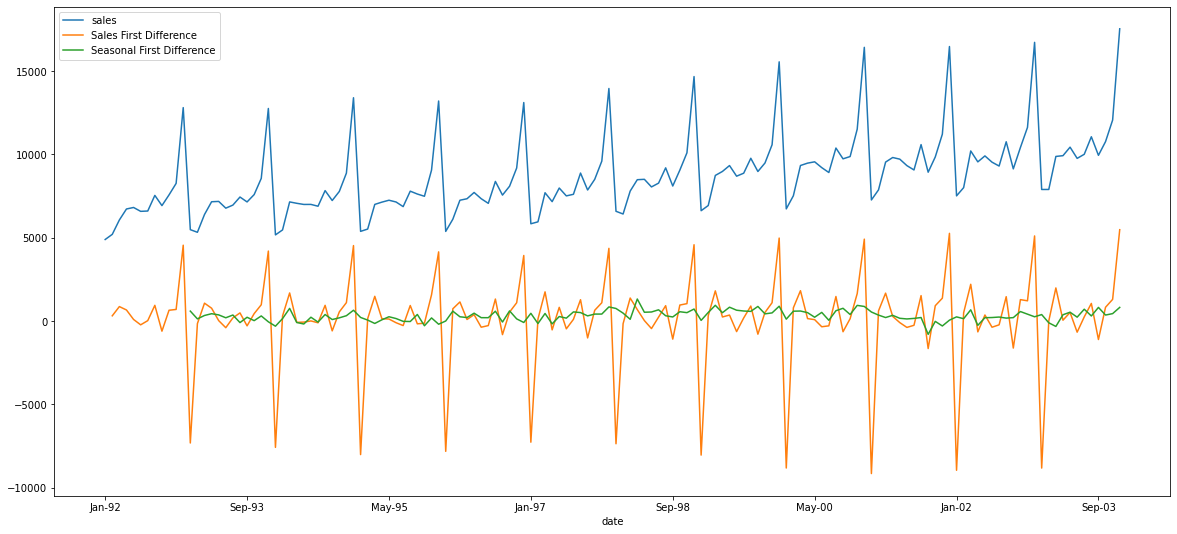

In [11]:
# Plot ant show the time series on axis ax
fig, ax = plt.subplots();
cloth.plot(ax=ax);